In [1]:
%load_ext autoreload
%autoreload 2

# Introduction

This analysis explores the effect of the COVID-19 lockdown in the air pollution in Barcelona from a _different perspective_: by using open tools for sensing and data analysis. The main motivation for carrying out this effort is not to demonstrate the obvious effect of the decrease in air pollution and noise levels, which is easily percieved by anyone living in Barcelona and has been published in the media in various formats. This analysis, however is motivated by the idea that anyone, with or without sensors, can access this data, dig through it, and extract their own conclusions, not needing the media or others to analyse it for them.

To achieve this, we have used low-cost sensor data from the open source project: [Smart Citizen](http://smartcitizen.me). The sensors are currently deployed around the world by individual users or communities that are willing to know more about their environment, and more in particular, about air pollution. As well, we have included data from open portals, such as the air pollution data and traffic information from the local authorities in Barcelona. The data is currently accesible by anyone through the [Smart Citizen API](https://api.smartcitizen.me/), or the [Open Data Portal API](https://opendata-ajuntament.barcelona.cat/).

Although all this might sound interesting, accessing the data, and analysing it, can be hard to do. For this reason, this whole report makes uses of an open data analysis framework that integrates these, and more data sources, as well as analysis, reporting and modeling tools. This is available for anyone to use or contribute in [this repository](https://github.com/fablabbcn/smartcitizen-data-framework). To summarize, what we see below is all open, integrated and available for anyone to use:

In [25]:
from IPython.display import HTML, display
display(HTML('<img src="../assets/images/Workflow.png">'))

Finally, let's wrap it all up by asking some questions:
- Is the car the main source of pollution at the moment?
- What will be the new normal, once the COVID-19 lockdown is over? Will we have more or less pollution than before? And, will we be able to know?
- Will we use more private transport because people is paranoid of the metro?

## Load Data

In [2]:
import scdata as sc
sc._config.config.out_level = 'DEBUG'

### Stations data

This is the data of two Smart Citizen Stations that are currently located at Avda Roma with Compte Urgell.

In [3]:
scs_testname = '2020-04_INT_EVALUATION_CSIC_AVDA_ROMA'

# Set options below or use defaults from config.yaml 
options = {'clean_na': None}
# options = {'clean_na': False, 'clean_na_method': 'drop', 'frequency': '3Min', 'load_cached_API': True, 'store_cached_API': True}

In [5]:
test = sc.Test(scs_testname)
test.load(options = options)

[INFO]: 60 --- 2020-04_INT_EVALUATION_CSIC_AVDA_ROMA


Similar tests found, please select one or input other name [New]:  60


[INFO]: Test full name, 2020-04_INT_EVALUATION_CSIC_AVDA_ROMA
[SUCCESS]: Loaded cached files
[SUCCESS]: Device 10751 has been loaded
[SUCCESS]: Loaded cached files
[SUCCESS]: Device 10752 has been loaded
[WARNING]: Cannot load cached data with an API that does not allow checking when was the last reading available
[ERROR]: Failed sensor request request. Probably no connection
[WARNING]: Removing sensors from device: ['GB_2A', 'GB_2W', 'GB_3A', 'GB_3W', 'HUM', 'NOISE_A', 'PM_10', 'PM_25', 'TEMP']
[WARNING]: Could not load device 11707152. Skipping
[WARNING]: Cannot load cached data with an API that does not allow checking when was the last reading available
[ERROR]: Failed sensor request request. Probably no connection
[WARNING]: Removing sensors from device: ['GB_2A', 'GB_2W', 'GB_3A', 'GB_3W', 'HUM', 'NOISE_A', 'PM_10', 'PM_25', 'TEMP']
[WARNING]: Could not load device 2160711. Skipping
[WARNING]: Cannot load cached data with an API that does not allow checking when was the last readi

### SCKs data

Get all the SCKs that are currently online in Barcelona and were posting before the lockdown

In [ ]:
from src.data.api import ScApiDevice

outdoor_kitsdf = ScApiDevice.get_world_map(min_date='2020-03-15', max_date='2020-04-01', city='Barcelona', tags = ['outdoor'], tag_method = 'all', full = True)
outdoor_kits = list(outdoor_kitsdf.index)
print ('Outdoor Kits')
print (outdoor_kits)

indoor_kitsdf = ScApiDevice.get_world_map(min_date='2020-03-15', max_date='2020-04-01', city='Barcelona', tags = ['indoor', 'online'], tag_method = 'all', full = True)
indoor_kits = list(indoor_kitsdf.index)
print ('Indoor Kits')
print (indoor_kits)

In [ ]:
from src.visualization.visualization_tools import device_history_map
import pandas as pd
options = {'fillOpacity':1, 'radius':10}
device_history_map(zoom = 12.5, map_type = 'geo', sensors_df = pd.concat([outdoor_kitsdf, indoor_kitsdf]), options = options)

In [ ]:
blueprint = 'sck_21'
_sck_testname_indoor = 'COVID_SCK_BARCELONA_INDOOR'

# Here we specify the different options for data load
options = {'frequency': '5Min',
            'min_date': None,
            'max_date': None,
            'clean_na': None
            }

# Add devices to list
from src.data.device import Device

tdevices = list()
for device in indoor_kits:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': str(device), 
                                                                'source': 'api'
                                                                }))
# We load the data based on the input above
sck_testname_indoor = data.load_devices(_sck_testname_indoor, tdevices, options = options)

In [43]:
blueprint = 'sck_21'
_sck_testname_outdoor = 'COVID_SCK_BARCELONA_OUTDOOR'

# Here we specify the different options for data load
options = {'frequency': '5Min',
            'min_date': None,
            'max_date': None,
            'clean_na': None
            }

# Add devices to list
from src.data.device import Device

tdevices = list()
for device in outdoor_kits:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': str(device), 
                                                                'source': 'api'
                                                                }))
# We load the data based on the input above
sck_testname_outdoor = data.load_devices(_sck_testname_outdoor, tdevices, options = options)

Add device 9657 OK
Add device 10504 OK
Add device 10015 OK
Add device 9955 OK
Add device 10640 OK
Add device 9781 OK
Add device 10664 OK
Add device 10752 OK
Add device 5353 OK
Add device 9791 OK
Add device 10751 OK
Add device 10869 OK
Add device 9693 OK
Add device 11025 OK
Creating new test
Test update Finished
Processing files
Test 2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR path: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/processed/2020/04/2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR
Test creation finished
Loading test 2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR
Using options: {'cached_data_margin': 1, 'load_cached_api': True, 'store_cached_api': True, 'clean_na': None, 'frequency': '5Min', 'min_date': '2020-01-01', 'max_date': None}
---------------------------
Loading device 9657
Device 9657 is located at 41.4305247195468, 2.1824061870575
Device 9657 timezone is Europe/Madrid
Device 9657 has last reading at 2020-04-1

In [6]:
sck_testname_outdoor = '2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR'
options = {'frequency': '15Min',
            'min_date': '2020-01-01',
            'max_date': None,
            'clean_na': None
            }

test_kits = sc.Test(sck_testname_outdoor)
test_kits.load(options = options)

[INFO]: 57 --- 2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR


Similar tests found, please select one or input other name [New]:  57


[INFO]: Test full name, 2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR
[WARNING]: Removing sensors from device: ['BATT']
[SUCCESS]: Loaded cached files
[SUCCESS]: Device 10015 loaded successfully from API
[SUCCESS]: File saved to: 
/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/data/processed/2020/04/2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR/cached/10015.csv
[SUCCESS]: Device 10015 has been loaded
[WARNING]: Removing sensors from device: ['CCS811_ECO2']
[SUCCESS]: Loaded cached files
[SUCCESS]: Device 10504 loaded successfully from API
[SUCCESS]: File saved to: 
/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/data/processed/2020/04/2020-04_INT_COVID_SCK_BARCELONA_OUTDOOR/cached/10504.csv
[SUCCESS]: Device 10504 has been loaded
[WARNING]: Removing sensors from device: ['CCS811_ECO2']
[SUCCESS]: Loaded cached files
[SUCCESS]: Device 10640 loaded successfully from API
[SUC

In [ ]:
sck_testname_indoor = '2020-04_INT_COVID_SCK_BARCELONA_INDOOR'
options = {'frequency': '15Min',
            'min_date': '2020-01-01',
            'max_date': None,
            'clean_na': None
            }

data.load_test(sck_testname_indoor, options = options)

### Agencia salut publica

In [8]:
from scdata.io.read_api import DadesObertesApiDevice
do_stations = DadesObertesApiDevice.get_world_map(city='Barcelona')
print ('Agencia Salut Publica Stations')
print (do_stations)

Agencia Salut Publica Stations
[8019042, 8019043, 8019044, 8019050, 8019054, 8019057, 8019058, 8019004]


In [ ]:
blueprint = 'csic_station'
_do_testname = 'COVID_ASP_BARCELONA'

# Here we specify the different options for data load
options = {'frequency': '1H',
            'min_date': None,
            'max_date': None,
            'clean_na': None
            }

# Add devices to list
from src.data.device import Device

tdevices = list()
for device in do_stations:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': str(device), 
                                                                'source': 'api'
                                                                }))
# We load the data based on the input above
do_testname = data.load_devices(_do_testname, tdevices, options = options)

In [9]:
do_testname = '2020-04_INT_COVID_ASP_BARCELONA'
options = {'frequency': '1H',
            'min_date': '2020-01-01',
            'max_date': None,
            'clean_na': None
            }
test_do = sc.Test(do_testname)
test_do.load(options = options)

[INFO]: 58 --- 2020-04_INT_COVID_ASP_BARCELONA


Similar tests found, please select one or input other name [New]:  58


[INFO]: Test full name, 2020-04_INT_COVID_ASP_BARCELONA
[WARNING]: Cannot load cached data with an API that does not allow checking when was the last reading available
[SUCCESS]: Successful filtering
[SUCCESS]: Successful pivoting
[SUCCESS]: Successful renaming
[SUCCESS]: Device 8019004 loaded successfully from API
[WARNING]: Removing sensors from device: ['C6H6', 'CO', 'H2S', 'O3', 'SO2']
[SUCCESS]: File saved to: 
/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/data/processed/2020/04/2020-04_INT_COVID_ASP_BARCELONA/cached/8019004.csv
[SUCCESS]: Device 8019004 has been loaded
[WARNING]: Cannot load cached data with an API that does not allow checking when was the last reading available
[SUCCESS]: Successful filtering
[SUCCESS]: Successful pivoting
[SUCCESS]: Successful renaming
[SUCCESS]: Device 8019042 loaded successfully from API
[WARNING]: Removing sensors from device: ['C6H6', 'CO', 'H2S', 'O3', 'PM_10', 'SO2']
[SUCCES

### Traffic data API

Check traffic data from here: https://opendata-ajuntament.barcelona.cat/data/en/dataset/trams

NB: Find the tram ids: https://opendata-ajuntament.barcelona.cat/data/ca/dataset/transit-relacio-trams

## Process data

### Add extra metrics

We will add extra metrics for the different devices in our tests.
First the stations:

In [12]:
for metric in ['CO', 'EXT_PM_1_CLEAN', 'NOISE_A', 'HUM', 'EXT_PM_25_CLEAN', 'EXT_PM_10_CLEAN']:
    for device in ['10751', '10752']:    
        test.devices[device].add_metric({f'{metric}_AVG_1D': {'process': 'rolling_avg',
                                                                'kwargs': {'name': metric,
                                                                           'window_size': '1D'}
                                                               }
                                                     })

[SUCCESS]: Metric {'CO_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'CO', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'CO_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'CO', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'EXT_PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'EXT_PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'EXT_PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'EXT_PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'NOISE_A_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOISE_A', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'NOISE_A_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOISE_A', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'HUM_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'HUM', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'HUM_AVG_1D': {'process': 'rolling_avg', 'k

In [13]:
for metric in ['PM_10', 'NOX']:
    for device in test_do.devices:    
        test_do.devices[str(device)].add_metric({f'{metric}_AVG_1D': {'process': 'rolling_avg',
                                                                'kwargs': {'name': metric,
                                                                           'window_size': '1D'}
                                                               }
                                                     })

[SUCCESS]: Metric {'PM_10_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_10', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_10_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_10', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_10_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_10', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_10_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_10', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_10_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_10', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'NOX_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOX', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'NOX_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOX', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'NOX_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'NOX', 'window_size

In [11]:
for metric in ['PM_1_CLEAN', 'PM_25_CLEAN', 'PM_10_CLEAN', 'NOISE_A']:
    for device in test_kits.devices:
        test_kits.devices[str(device)].add_metric({f'{metric}_AVG_1D': {'process': 'rolling_avg',
                                                                'kwargs': {'name': metric,
                                                                           'window_size': '1D'}
                                                               }
                                                     })

[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'PM_1_CLEAN_AVG_1D': {'process': 'rolling_avg', 'kwargs': {'name': 'PM_1_CLEAN', 'window_size': '1D'}}} added to metrics
[SUCCESS]: Metric {'

In [16]:
test.process()
test_kits.process()
test_do.process()

[INFO]: ---------------------------
[INFO]: Processing device 10751
[INFO]: Processing CO
[INFO]: Loading basic_4electrode_alg from scdata.device.process
[INFO]: No units conversion needed for CO
[INFO]: Processing EXT_PM_10_CLEAN
[INFO]: Loading merge_ts from scdata.device.process
[INFO]: Processing EXT_PM_1_CLEAN
[INFO]: Loading merge_ts from scdata.device.process
[INFO]: Processing EXT_PM_25_CLEAN
[INFO]: Loading merge_ts from scdata.device.process
[INFO]: Processing NO2
[INFO]: Loading baseline_4electrode_alg from scdata.device.process
[INFO]: Converting units for NO2. From ppm to ppb
[INFO]: Factor: 1000
[INFO]: Processing NO2+O3
[INFO]: Loading baseline_4electrode_alg from scdata.device.process
[ERROR]: Problem with input data
[INFO]: Processing O3
[INFO]: Loading deconvolution from scdata.device.process
[INFO]: Converting units for O3. From ppm to ppb
[INFO]: Factor: 1000
[INFO]: Converting units for NO2. From ppm to ppb
[INFO]: Factor: 1000
[INFO]: Processing CO_AVG_1D
[INFO]: 

Traceback (most recent call last):
  File "/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1619, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1627, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'CCS811_VOCS'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/scdata/device/__init__.py", line 202, in process
    self.readings[metric] = funct(self.readings, *args, **kwargs)
  File "/Users/macoscar/Documents/04_Projec

[INFO]: Processing CCS811_VOCS_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[ERROR]: Metric args not in dataframe
[INFO]: ---------------------------
[INFO]: Processing device 10869
[INFO]: Processing CCS811_ECO2_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing CCS811_VOCS_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_10_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_1_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_25_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_1_CLEAN_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing PM_25_CLEAN_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing PM_10_CLEAN_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing NOISE_A_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: 

Traceback (most recent call last):
  File "/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1619, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1627, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'CCS811_VOCS'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/scdata/device/__init__.py", line 202, in process
    self.readings[metric] = funct(self.readings, *args, **kwargs)
  File "/Users/macoscar/Documents/04_Projec

[INFO]: Processing PM_1_CLEAN_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing PM_25_CLEAN_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing PM_10_CLEAN_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing NOISE_A_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: Processing CCS811_VOCS_AVG_1D
[INFO]: Loading rolling_avg from scdata.device.process
[INFO]: ---------------------------
[INFO]: Processing device 9791
[INFO]: Processing CCS811_ECO2_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing CCS811_VOCS_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_10_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_1_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_25_CLEAN
[INFO]: Loading clean_ts from scdata.device.process
[INFO]: Processing PM_1_CLEAN_AVG_1D
[INFO]: Lo

Traceback (most recent call last):
  File "/Users/macoscar/.virtualenvs/scdata/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1619, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1627, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'PM_10'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/scdata/device/__init__.py", line 202, in process
    self.readings[metric] = funct(self.readings, *args, **kwargs)
  File "/Users/macoscar/Documents/04_Projects/02_

True

## Explore Data

### PM1


#### Avinguda Roma
The data from the stations in Avinguda Roma is too volatile for PM due to the storms and different climate conditions

This graph shows the evolution of PM during the lockdown. During some days before the lockdown and after it, there is a big effect on the pollution due to the climate conditions

[INFO]: Using default formatting
[INFO]: Preparing data for plot
[INFO]: Making 1 subplots


<Figure size 432x288 with 0 Axes>

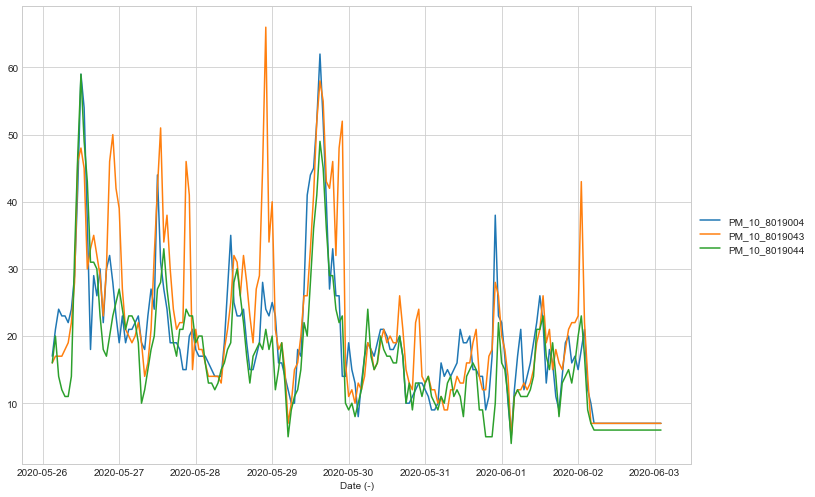

In [18]:
traces = {
            "1": {"devices": "all",
                  "channel": "PM_10",
                  "subplot": 1},
        }

options = {'frequency':'1H'}

test_do.ts_plot(traces = traces, options = options);

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

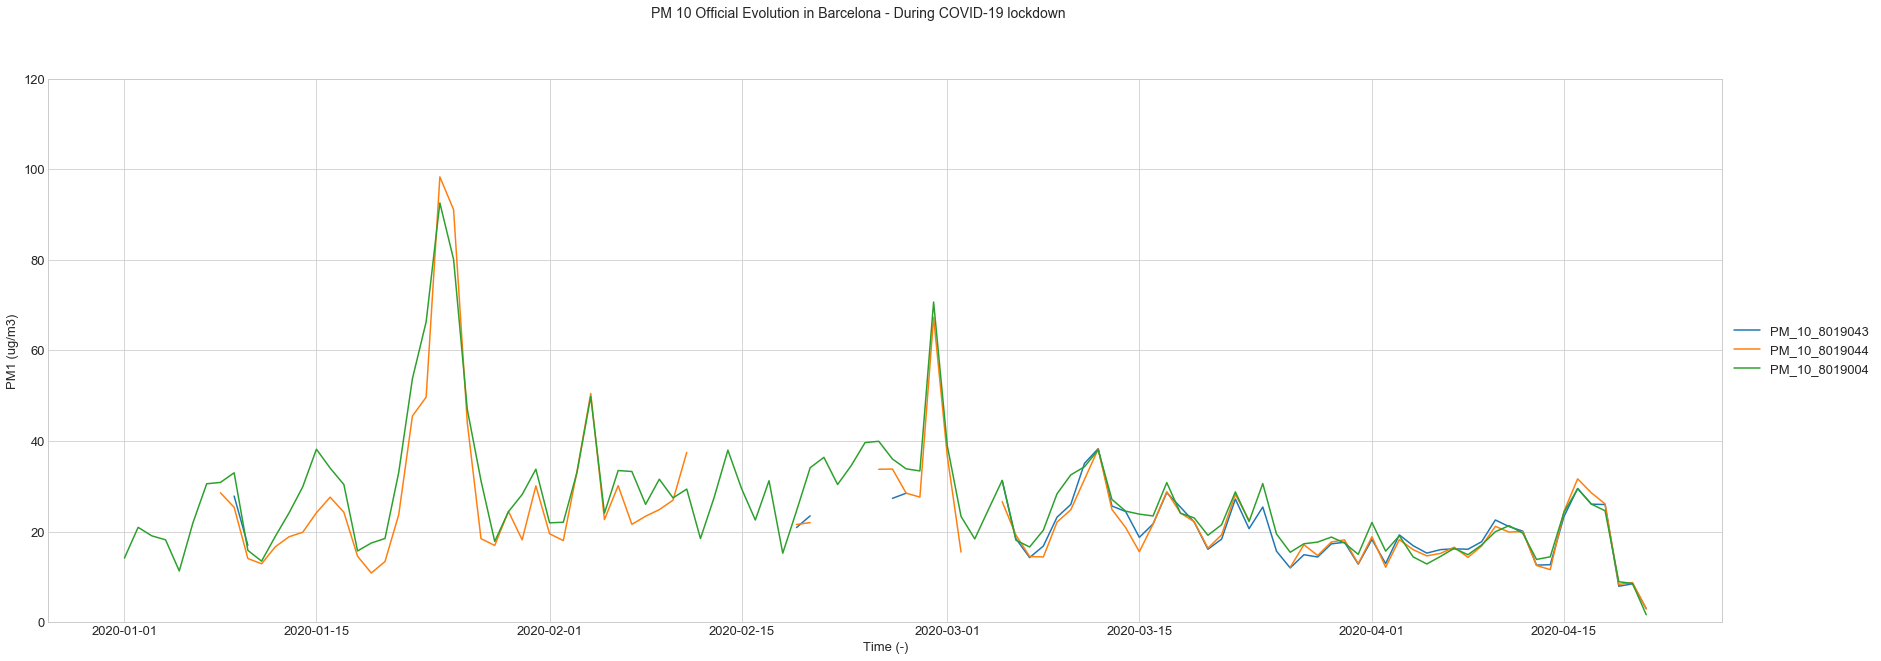

In [25]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": '2020-04_INT_COVID_ASP_BARCELONA',
                                     "traces": {"1": {"device": ['8019043', '8019044', '8019004'],
                                                    "channel" : "PM_10",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '1D',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-01'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "PM1 (ug/m3)"},
                                   "yrange": {1: [0, 120]},
                                   "title": "PM 10 Official Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

[INFO]: Using default formatting
[INFO]: Preparing data for plot
[INFO]: Making 1 subplots


<Figure size 432x288 with 0 Axes>

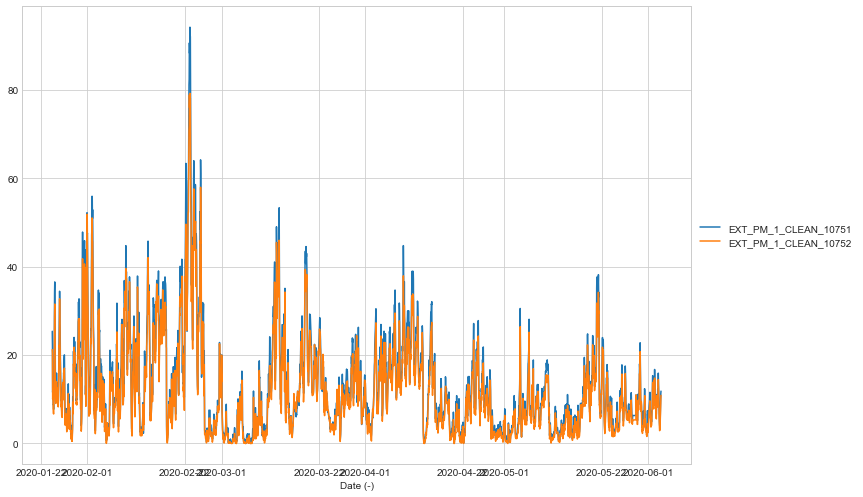

In [21]:
traces = {
            "1": {"devices": "all",
                  "channel": "EXT_PM_1_CLEAN",
                  "subplot": 1},
        }

options = {'frequency':'1H'}

test.ts_plot(traces = traces, options = options);

Preparing data for plot
Making 2 subplots
Plotting


<Figure size 432x288 with 0 Axes>

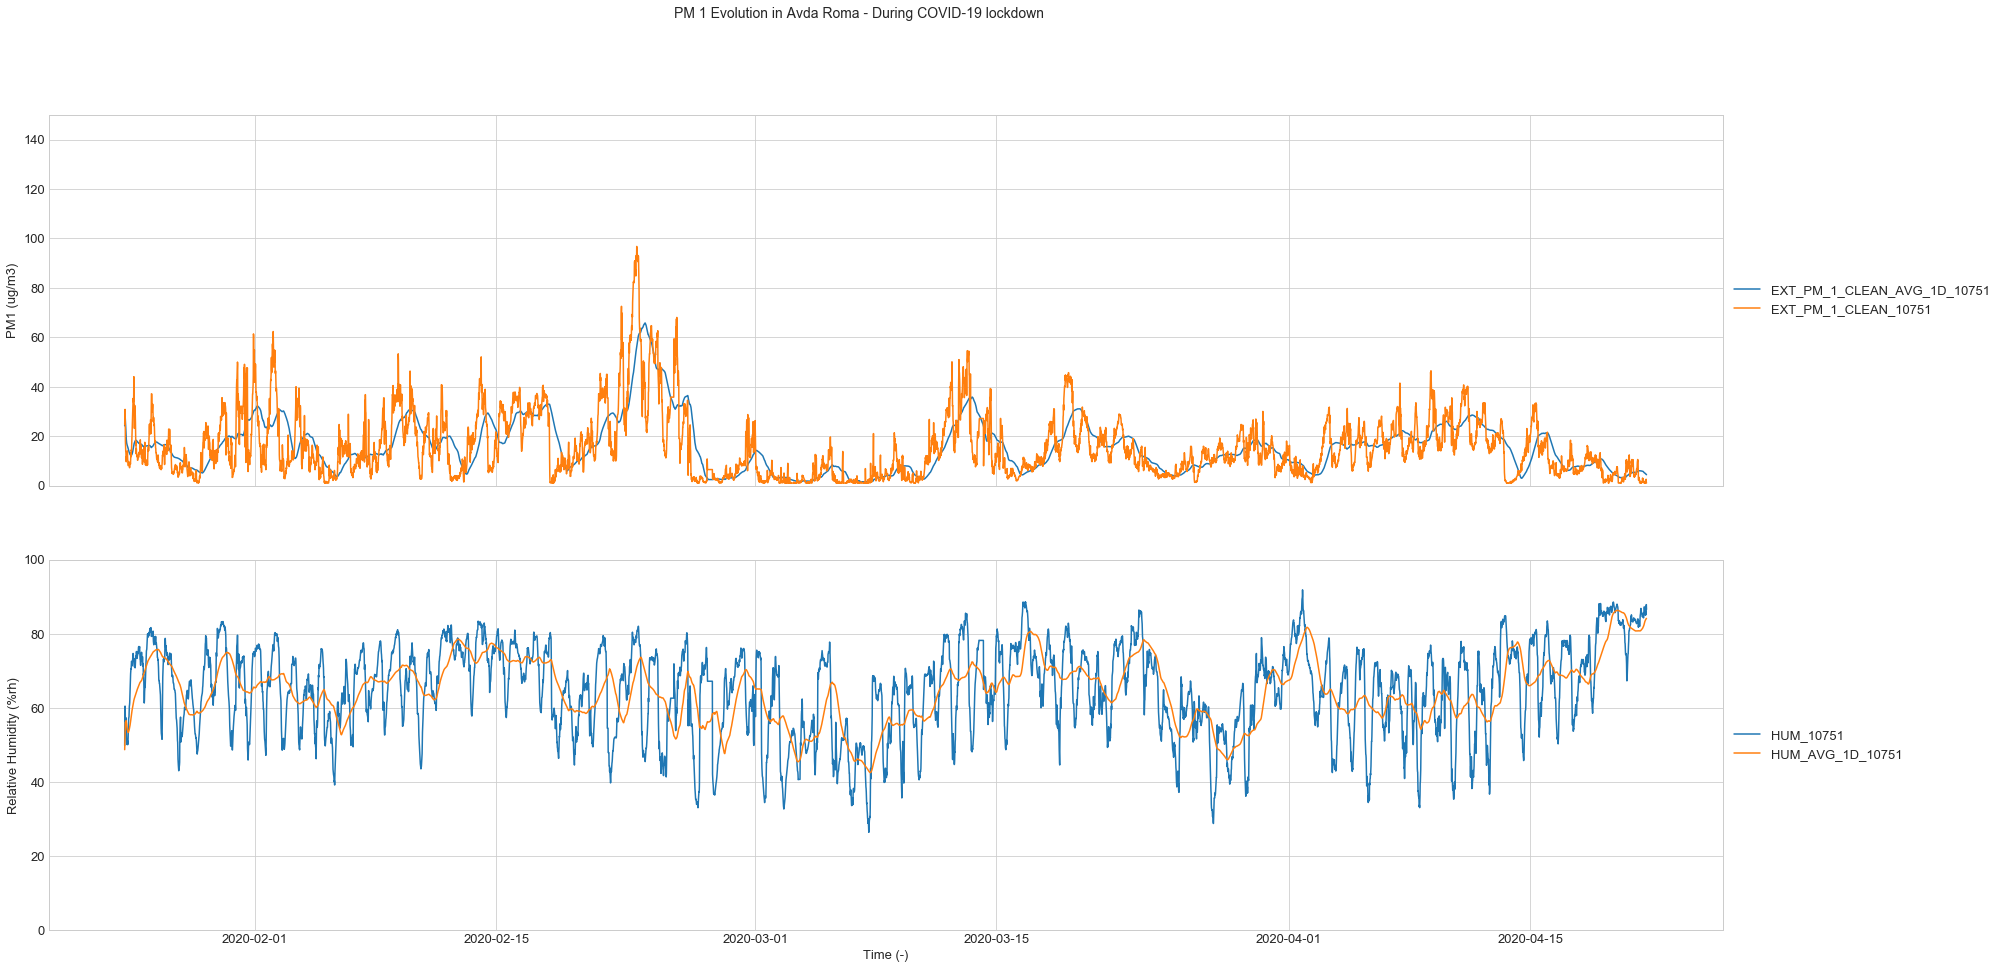

In [27]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": '10751',
                                                    "channel" : "EXT_PM_1_CLEAN_AVG_1D",
                                                    "subplot": 1},
                                               "2": {"device": '10751',
                                                    "channel" : "EXT_PM_1_CLEAN",
                                                    "subplot": 1},
                                               "3": {"device": '10751',
                                                    "channel" : "HUM",
                                                    "subplot": 2},
                                                "4": {"device": '10751',
                                                    "channel" : "HUM_AVG_1D",
                                                    "subplot": 2}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": 'fill',
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "PM1 (ug/m3)", 2: "Relative Humidity (%rh)"},
                                   "yrange": {1: [0, 150], 2: [0, 100]},
                                   "title": "PM 1 Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 15,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

#### SCKs Outdoor

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

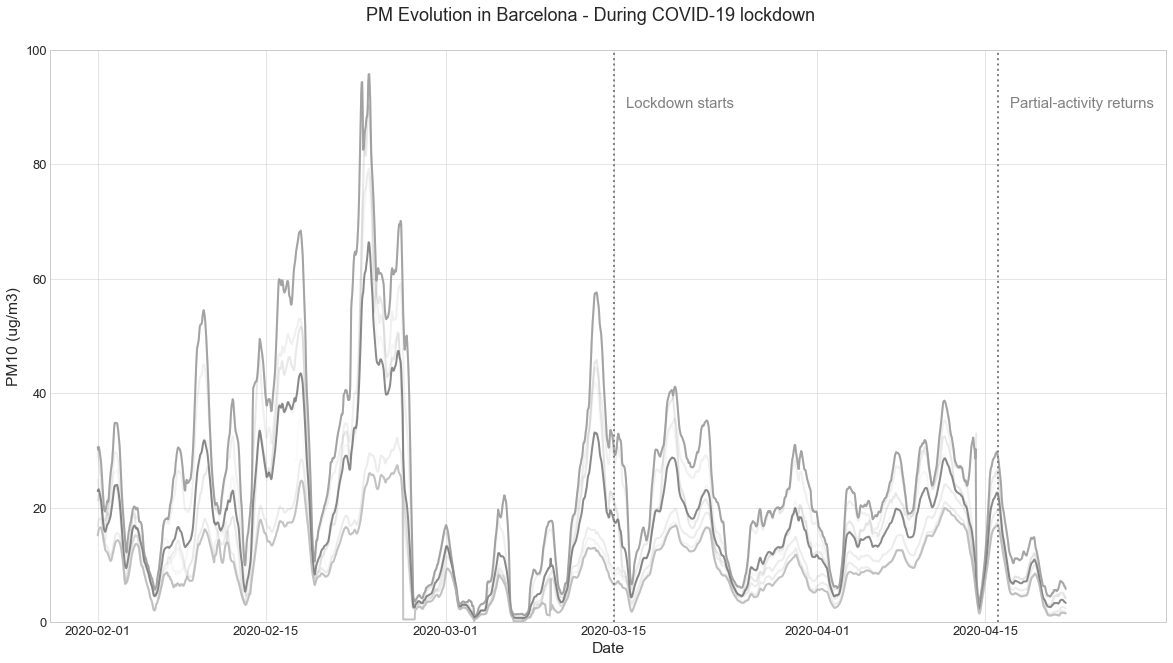

Exporting PM1 to /Users/macoscar/Desktop/IAAC-Article
Saved plot


In [340]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"2": {"device": [10015, 10640, 9781, 5353, 9791, 10869, 9693, 11025],
                                                    "channel" : "PM_10_CLEAN_AVG_1D",
                                                    "subplot": 1,
                                                    "include_avg": True,
                                                    "include_max": True,
                                                    "include_min": True,
                                                    "show_all": True
                                                    }}},
                    "options": {"show_plot": True,
                                "export_path": '/Users/macoscar/Desktop/IAAC-Article', 
                                "file_name": 'PM1',
                                "frequency": '1H',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-02-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "PM10 (ug/m3)"},
                                   "yrange": {1: [0, 100]},
                                   "xrange": {1: ['2020-01-28', '2020-04-30']},
                                   "title": "PM Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "legend": False,
                                   "alpha_highlight": 0.8,
                                   "alpha_other": 0.1,
                                   "height": 10,
                                   "width": 20,
                                   "suptitle_factor": 0.92,
                                   "style": "seaborn-whitegrid",
                                   "palette": "gray",
                                   "decorators": {'axvline': ['2020-03-15', '2020-04-16'],
                                                  'xtext': {'2020-03-16': 'Lockdown starts', 
                                                           '2020-04-17': 'Partial-activity returns'},
                                                  }
                                  }
                    }

plot = Plot(plot_description)
plot.plot(data)
plot.export()

In [310]:
data_pm = plot.df
data_pm['day_of_week'] = data_pm.index.day_name()
def is_business(x):
    if x['day_of_week'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']: return True
    else: return False
    
data_pm['is_business'] = data_pm.apply(lambda x: is_business(x), axis=1)
data_pm.head(5)

pdates = [None, '2020-03-15', None]
plabels = ['Pre-lockdown', 'During-lockdown']

if pdates[0] is None: pdates[0] = data_pm.index[0]
if pdates[-1] is None: pdates[-1] = data_pm.index[-1]
    
pdates = pd.to_datetime(pdates, utc=True)
data_pm_w = data_pm.assign(period = pd.cut(data_pm.index, pdates, labels = plabels, right = False))

In [342]:
data_pm_w.tail(25)

,PM_10_CLEAN_AVG_1D_10015,PM_10_CLEAN_AVG_1D_10640,PM_10_CLEAN_AVG_1D_10869,PM_10_CLEAN_AVG_1D_11025,PM_10_CLEAN_AVG_1D_5353,PM_10_CLEAN_AVG_1D_9693,PM_10_CLEAN_AVG_1D_9781,PM_10_CLEAN_AVG_1D_9791,PM_10_CLEAN_AVG_1D_TRACEAVG,PM_10_CLEAN_AVG_1D_TRACEMAX,PM_10_CLEAN_AVG_1D_TRACEMIN,day_of_week,is_business,period
TIME,,,,,,,,,,,,,,
2020-04-20 17:00:00+02:00,NaN,1.768098,NaN,1.305098,1.493860,4.280182,5.415643,5.355372,3.269709,5.436255,1.305098,Monday,True,During-lockdown
2020-04-20 18:00:00+02:00,NaN,1.835030,NaN,1.333476,1.532657,4.655392,5.667499,5.298258,3.387052,5.667499,1.333476,Monday,True,During-lockdown
2020-04-20 19:00:00+02:00,NaN,1.896023,NaN,1.365593,1.575013,4.592843,5.610829,5.191202,3.371917,5.610829,1.365593,Monday,True,During-lockdown
2020-04-20 20:00:00+02:00,NaN,1.890350,NaN,1.359550,1.591404,4.498165,5.568920,5.167247,3.345939,5.568920,1.359550,Monday,True,During-lockdown
2020-04-20 21:00:00+02:00,NaN,1.875063,NaN,1.319073,1.591353,4.552367,5.658653,5.181707,3.363036,5.658653,1.319073,Monday,True,During-lockdown
2020-04-20 22:00:00+02:00,NaN,1.873113,NaN,1.283696,1.573509,4.664804,5.631132,5.175581,3.366972,5.631132,1.283696,Monday,True,During-lockdown
2020-04-20 23:00:00+02:00,NaN,1.909701,NaN,1.279037,1.578321,4.808487,5.469022,5.211789,3.376060,5.469022,1.279037,Monday,True,During-lockdown
2020-04-21 00:00:00+02:00,NaN,1.972746,NaN,1.305357,1.617193,4.721317,5.490489,4.982433,3.348256,5.490489,1.305357,Tuesday,True,During-lockdown
2020-04-21 01:00:00+02:00,NaN,1.994706,NaN,1.264389,1.615163,4.587633,5.603802,4.678049,3.290624,5.603802,1.264389,Tuesday,True,During-lockdown


In [314]:
import seaborn as sns

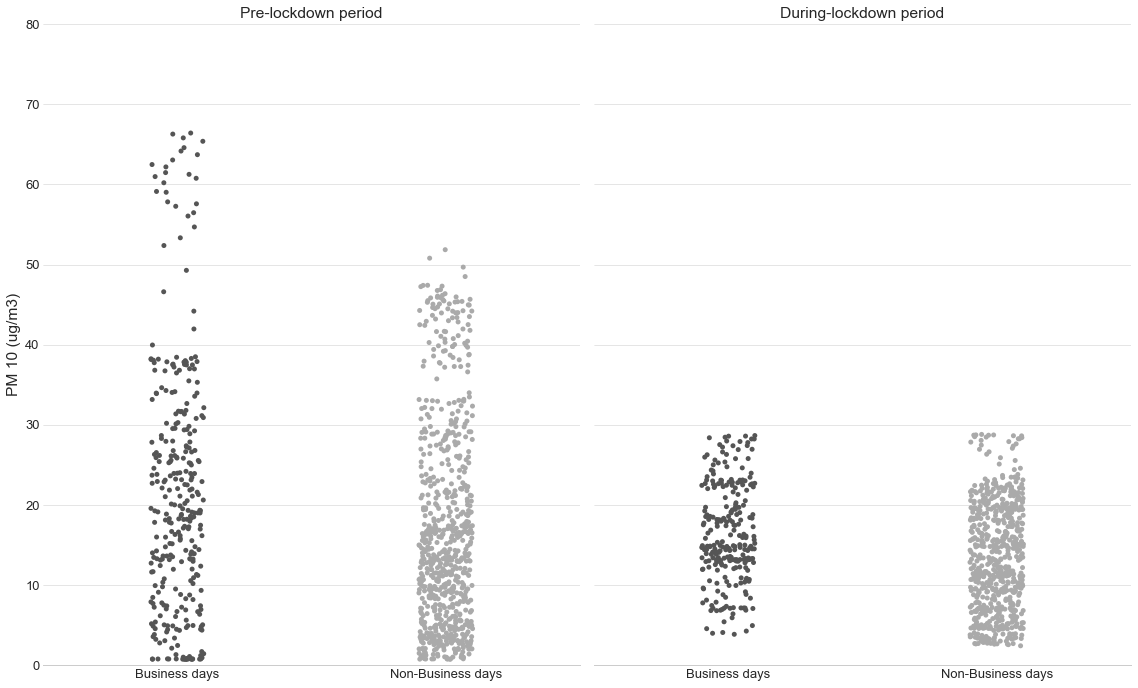

In [339]:

g = sns.catplot(x='is_business', y="PM_10_CLEAN_AVG_1D_TRACEAVG", col="period",
                data=data_pm_w,
                #kind="bar", 
                aspect = 0.8, height = 10, palette = "gray")
(g.set_axis_labels("", "PM 10 (ug/m3)")
  .set_xticklabels(["Business days", "Non-Business days"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 80))
  .despine(left=True))  
                
# Set title

#_ = g.title('PM Evolution during COVID-19 Barcelona');
# Save it in global and show
g.savefig('/Users/macoscar/Desktop/IAAC-Article/PM_bar.png', dpi = 300, transparent=False, bbox_inches='tight')

In [302]:
channel = "NOISE_A"
freq = '1D'
date_r = pd.date_range(start='2020-01-01', end='2020-04-17', normalize = True, freq=freq).strftime('%Y-%m-%d')
date_l = list()
for item in date_r.values: date_l.append(str(item))

if 'PM' in channel:
    bins = [0, 20, 40, 50, 75, np.inf]
    colors = ['#2971b1', '#c2ddeb', '#faccb4', '#e48065', '#b92732']
elif 'NOISE' in channel:
    bins = [50, 55, 60, 65, 70, np.inf]
    colors = ['#052f60', '#f4a582', '#d6604d', '#b1182a', '#67001f']    

features = []
for device in [10751, 9781, 10752, 10664, 9955, 11025, 9791]:
    lat = data.tests[sck_testname_outdoor].devices[str(device)].api_device.lat
    long = data.tests[sck_testname_outdoor].devices[str(device)].api_device.long
    if lat is None or long is None: continue
    dfc = data.tests[sck_testname_outdoor].devices[str(device)].readings.resample(freq).mean()    
    dfc['color'] = pd.cut(dfc[channel], bins, labels=colors)
    #print (device)
    #print (set(data.tests[sck_testname_outdoor].devices[str(device)].readings['color'].values))    
    for date in date_l:
        if date not in dfc.index: continue
        if date_l.index(date) > len(date_l)-2: continue
        features.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'LineString',
                    'coordinates': [[str(long), str(lat)]]*2,
                    'popup': str(device),
                },
                'properties': {
                    'times': [date, date_l[date_l.index(date)+1]],
                    'icon': 'circle',
                    'iconstyle': {
                        'fillColor': str(dfc.loc[date,'color']),
                        'fillOpacity': '0.6',
                        'stroke': 'false',
                        'radius': '15'
                    },
                    'style': {'weight': '0'},
                    'id': 'man'
                }
            }
        )

In [ ]:
from folium import plugins, Map, Marker, Circle

m = Map(
    location=[41.3947688,2.0787279],
    tiles='Stamen Toner',
    zoom_start=12,
)

plugins.TimestampedGeoJson(
    {
        'type': 'FeatureCollection',
        'features': features
    },
    period='P1D',
    add_last_point=True,
    auto_play=False,
    loop=False,
    max_speed=5,
    loop_button=True,
    date_options='YYYY/MM/DD',
    time_slider_drag_update=True,
    duration='P1D'
).add_to(m)

m

### TVOC

#### SCKs Outdoor

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

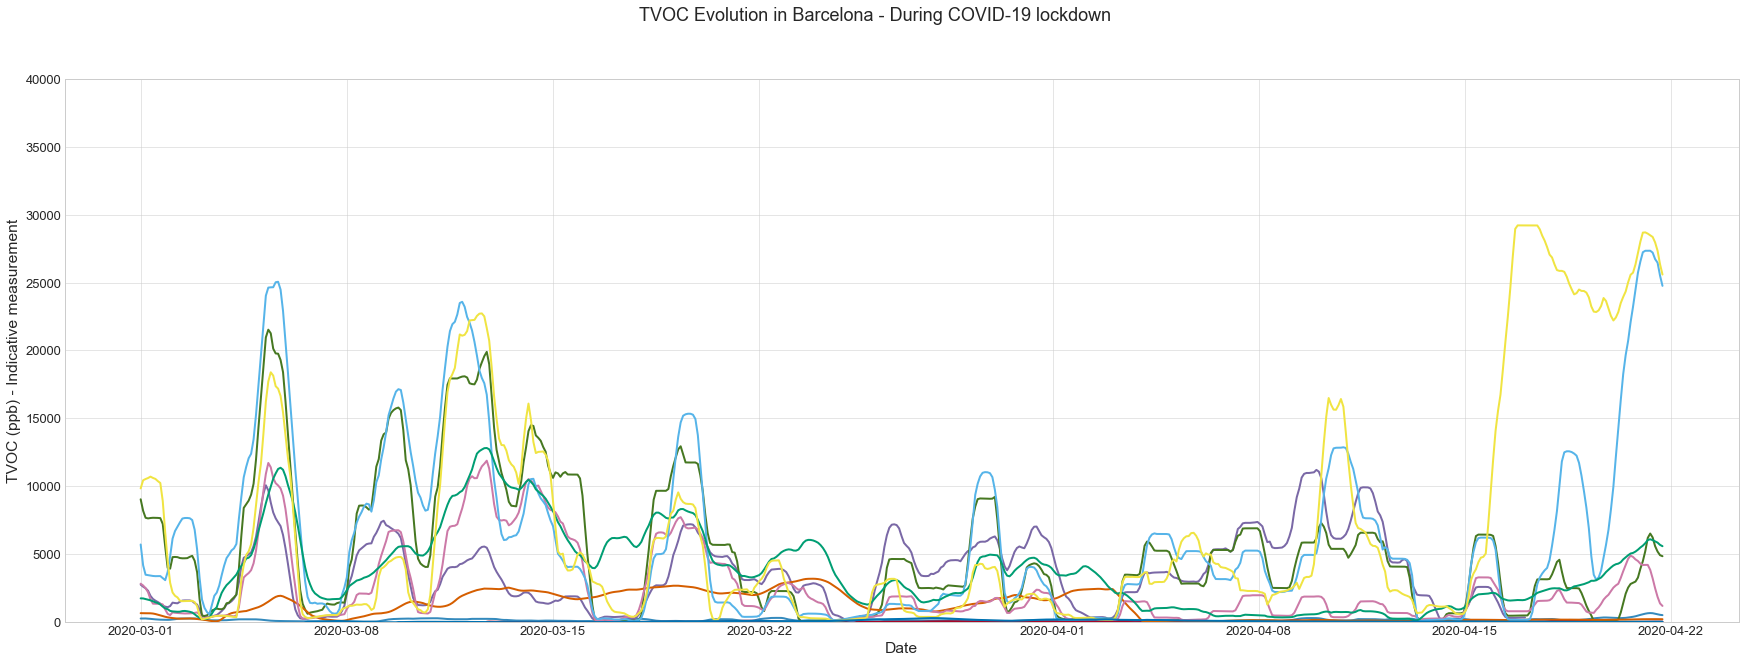

In [169]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": outdoor_kits,
                                                    "channel" : "CCS811_VOCS_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '2H',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-03-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "TVOC (ppb) - Indicative measurement"},
                                   "yrange": {1: [0, 40000]},
                                   "title": "TVOC Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 10,
                                   "width": 30,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

### Indoor kits

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

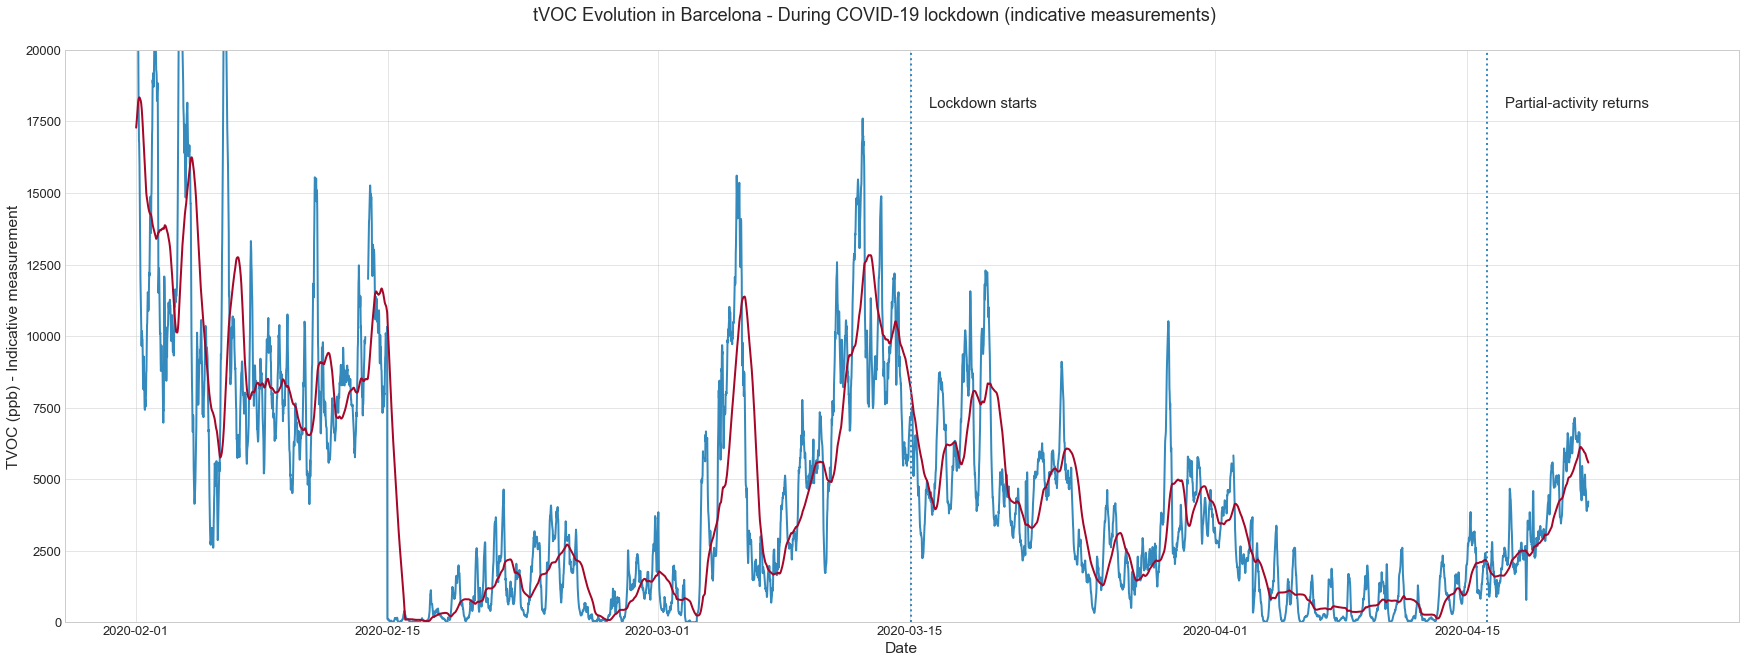

In [129]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": 9791,
                                                    "channel" : "CCS811_VOCS",
                                                    "subplot": 1},
                                               "2": {"device": 9791,
                                                    "channel" : "CCS811_VOCS_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-02-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "TVOC (ppb) - Indicative measurement"},
                                   "xrange": {1: ['2020-01-28', '2020-04-30']},
                                   "yrange": {1: [0, 20000]},
                                   "title": "tVOC Evolution in Barcelona - During COVID-19 lockdown (indicative measurements)",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "suptitle_factor": 0.92,
                                   "style": "seaborn-whitegrid",
                                   "decorators": {'axvline': ['2020-03-15', '2020-04-16'],
                                                  'text': {'2020-03-16': 'Lockdown starts', 
                                                           '2020-04-17': 'Partial-activity returns'},
                                                  }
                                  }
                    }

plot = Plot(plot_description)
plot.plot(data)

In [ ]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": 9791,
                                                    "channel" : "CCS811_VOCS",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '60Min',
                                "resample": "mean",
                                "clean_na": "fill",
                                "min_date": '2020-03-01',
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "VOCS Device 9791 - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None, 
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    
                   }


plot = Plot(plot_description)
plot.plot(data)

### CO

#### Avinguda Roma
The two stations in Avinguda Roma show a huge decrease in the chemical composition of the area. The average decrease in CO is roughly 0.5ppm, although peak levels in previous days (the measurements are done with 1Min resulution and the plot shown below has a rolling average of 15min. Under this conditions, the CO levels reached several times more than 2ppm CO).

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

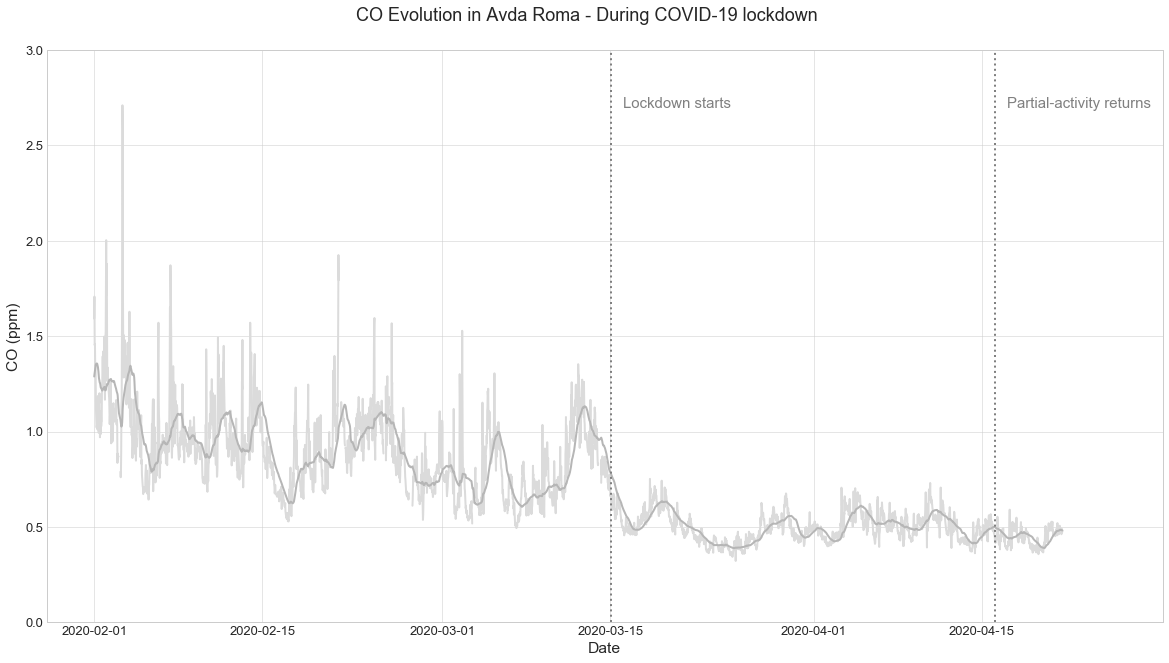

Exporting CO to /Users/macoscar/Desktop/IAAC-Article
Saved plot


In [348]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": '10751',
                                                    "channel" : "CO",
                                                    "subplot": 1},
                                               "2": {"device": '10751',
                                                    "channel" : "CO_AVG_1D",
                                                    "subplot": 1}
                                              }},
                    "options": {"show_plot": True,
                                "export_path": '/Users/macoscar/Desktop/IAAC-Article', 
                                "file_name": 'CO',
                                "frequency": '30Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-02-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "CO (ppm)"},
                                   "yrange": {1: [0, 3]},
                                   "xrange": {1: ['2020-01-28', '2020-04-30']},
                                   "title": "CO Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "suptitle_factor": 0.92,
                                   "style": "seaborn-whitegrid",
                                   "palette": "gist_gray_r",
                                    "decorators": {'axvline': ['2020-03-15', '2020-04-16'],
                                                  'xtext': {'2020-03-16': 'Lockdown starts', 
                                                           '2020-04-17': 'Partial-activity returns'},
                                                  }
                                  }
                    }

plot = Plot(plot_description)
plot.plot(data)
plot.export()

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

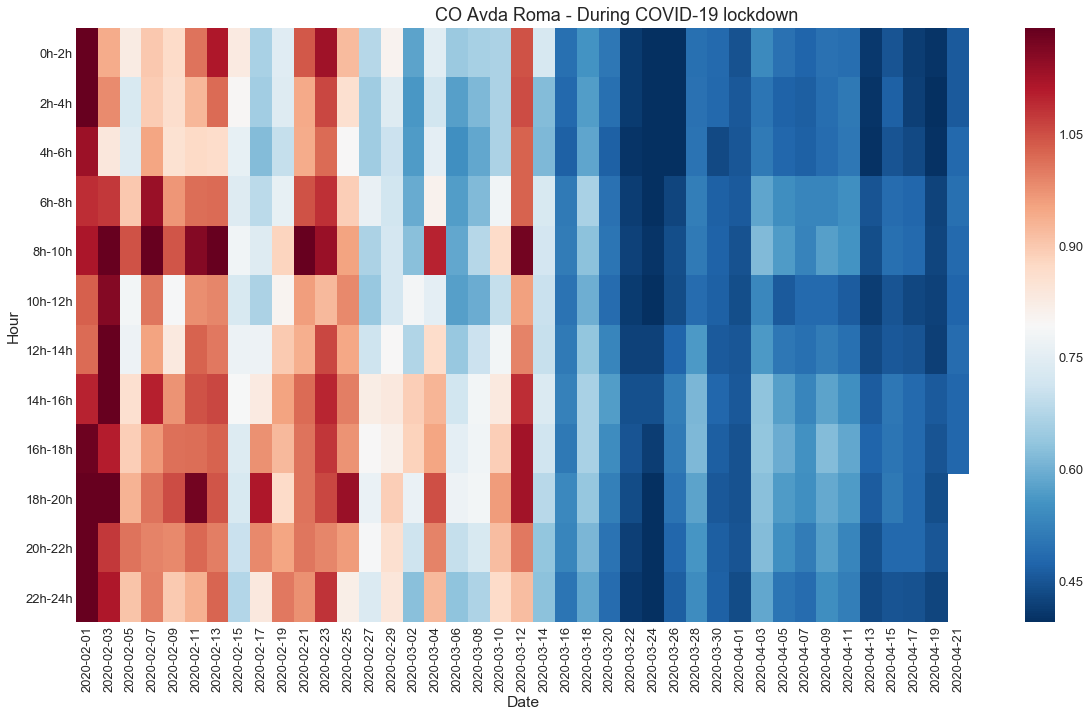

Exporting CO-heat to /Users/macoscar/Desktop/IAAC-Article
Saved plot


In [164]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "CO",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": '/Users/macoscar/Desktop/IAAC-Article', 
                                "file_name": "CO-heat",
                                "frequency": '60Min',
                                "session": '2D',
                                "resample": "mean",
                                "clean_na": None,
                                "min_date": '2020-02-01',
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "CO Avda Roma - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "xlabel": "Date",
                                   "vmin": None, 
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "suptitle_factor": 0.95,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)
plot.export()

[INFO]: Using default formatting
[INFO]: Preparing data for plot
[INFO]: Making 1 subplots


<Figure size 432x288 with 0 Axes>

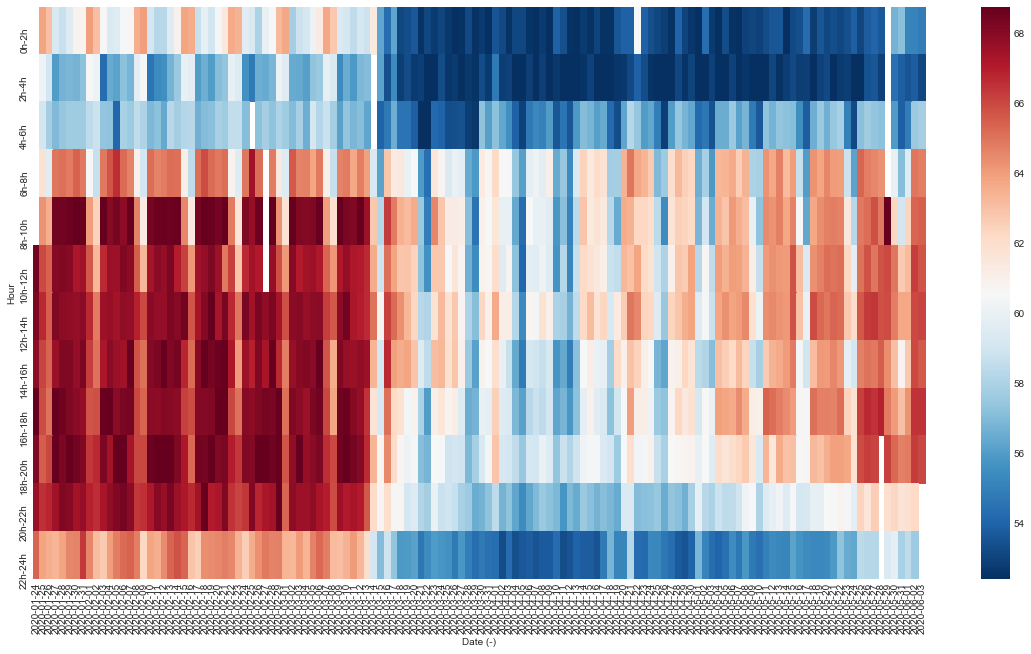

In [32]:
traces = {
            "1": {"devices": "10751",
                  "channel": "NOISE_A",
                  "subplot": 1},
        }

options = {'frequency':'2H', 'clean_na': 'drop'}

test.heatmap_plot(traces = traces, options = options);

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

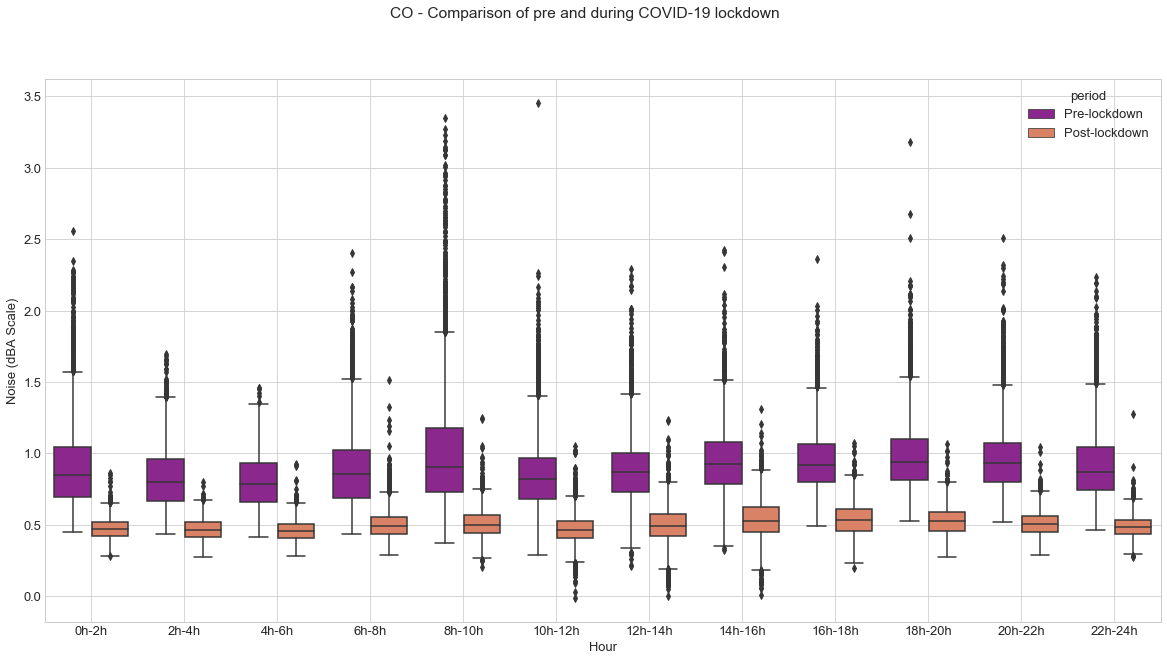

In [122]:
plot_description = {"type": "boxplot",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "CO",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '1Min',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "periods": {"dates": ['2020-01-20', '2020-03-15', None],
                                            "labels": ["Pre-lockdown", "Post-lockdown"]
                                           },
                                "relative": False
                                },
                    "formatting": {"title": "CO - Comparison of pre and during COVID-19 lockdown",
                                   "cmap": "plasma",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

### Noise

#### Avda Roma

The noise reduction of Avinguda Roma stations, is of roughly 7-8dBA, from an average level in a normal day of 65dBA down to approximatively 57dBA. During the weekends, this decrease is from 62dBA to 55dBA on average. It is also important to notice that the values of the last week (starting 13-04) have raised due to an increase of traffic activity, back to the levels of the second week of confinement.

[INFO]: Preparing data for plot
[INFO]: Making 1 subplots


<Figure size 432x288 with 0 Axes>

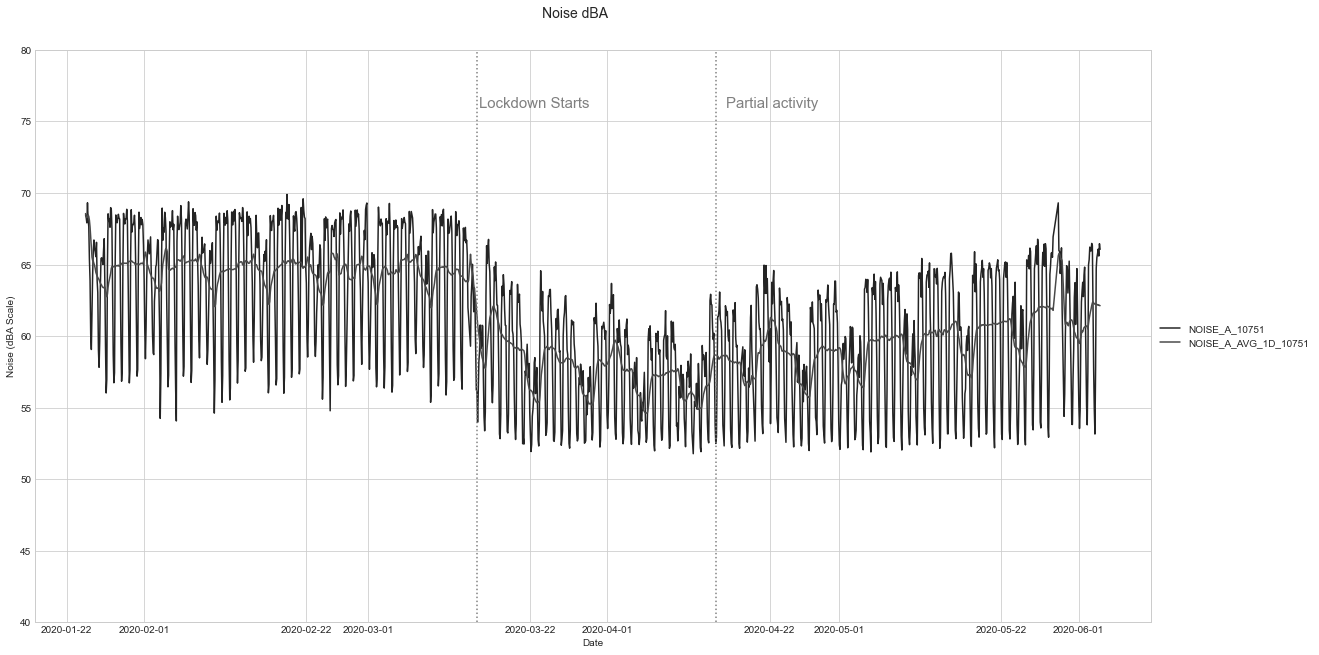

In [41]:
traces = {
            "1": {"devices": "10751",
                  "channel": "NOISE_A",
                  "subplot": 1},
            "2": {"devices": "10751",
                  "channel": "NOISE_A_AVG_1D",
                  "subplot": 1}    
        }

formatting = {"xlabel": "Date",
              "ylabel": {1: "Noise (dBA Scale)"},
              "yrange": {1: [40, 80]},
              "title": "Noise dBA",
              "sharex":True,
              "grid": True,
              "legend": True,
              "height": 10,
              "width": 20,
              "suptitle_factor": 0.92,
              "palette": "gist_gray",
              "decorators": {'axvline': ['2020-03-15', '2020-04-15'],
                               'xtext': {'2020-03-15 06:00:00': 'Lockdown Starts', 
                                         '2020-04-16 06:00:00': 'Partial activity'},
                            }
              }

test.ts_plot(traces = traces, options = options, formatting = formatting);

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

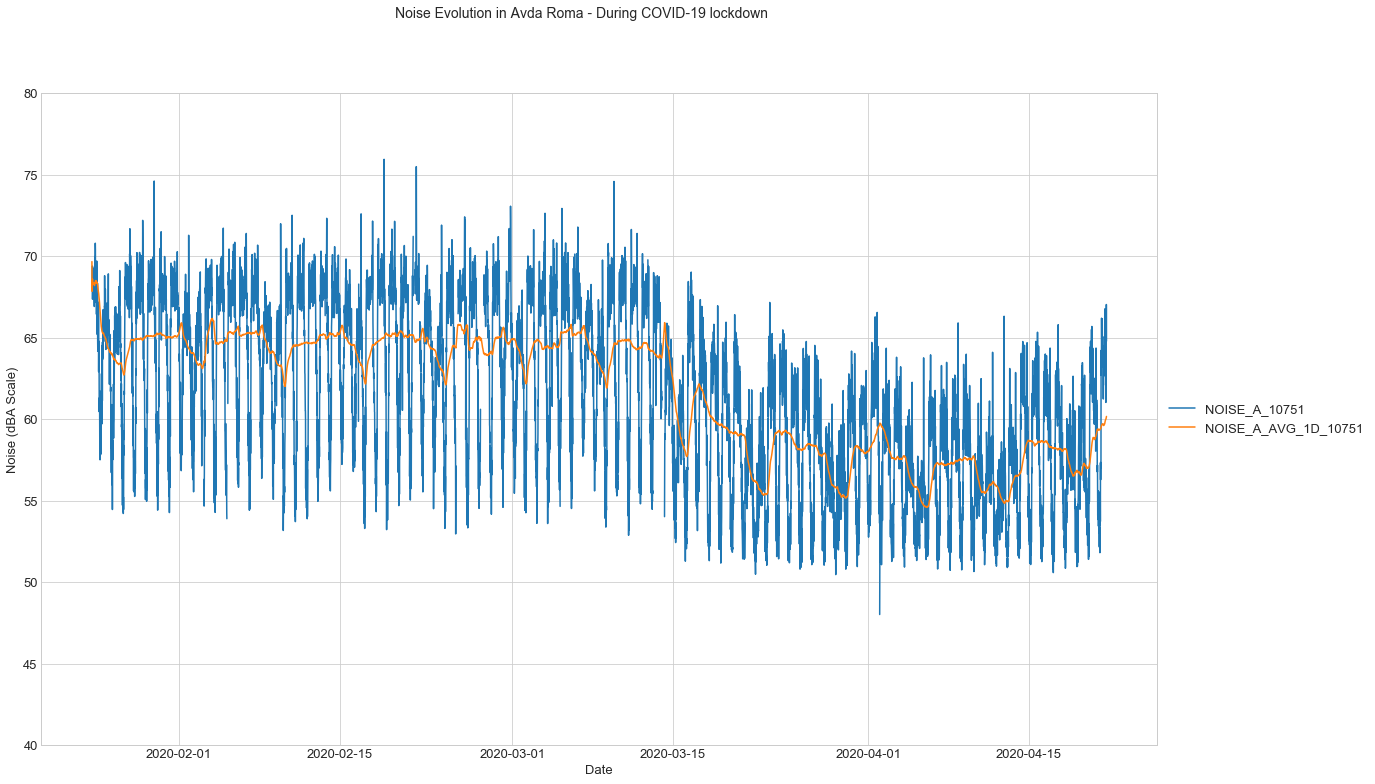

In [57]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                                    "traces": {"1": {"device": '10751',
                                                    "channel" : "NOISE_A",
                                                    "subplot": 1},
                                              "2": {"device": '10751',
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "yrange": {1: [40, 80]},
                                   "title": "Noise Evolution in Avda Roma - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 12,
                                   "width": 20,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

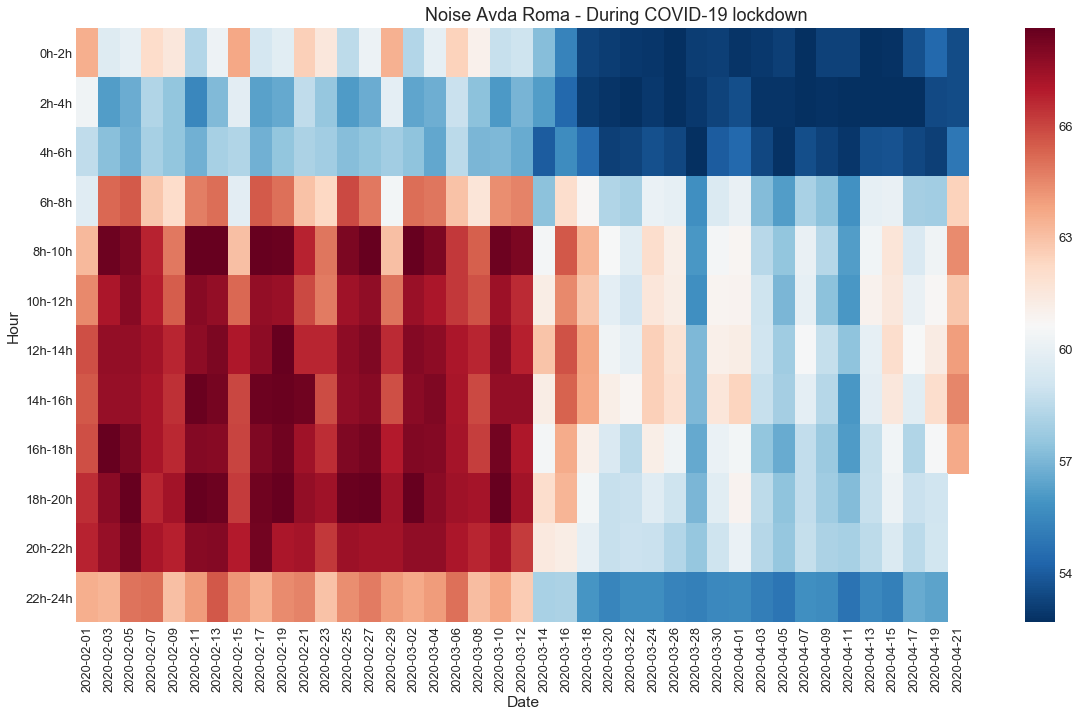

Exporting Noise-heat to /Users/macoscar/Desktop/IAAC-Article
Saved plot


In [161]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": scs_testname,
                    				"traces": {"1": {"device": "10751",
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": '/Users/macoscar/Desktop/IAAC-Article', 
                                "file_name": "Noise-heat",
                                "frequency": '15Min',
                                "session": '2D',
                                "clean_na": None,
                                "min_date": '2020-02-01',
                                "max_date": None,
                                "relative": False},
                    "formatting": {"title": "Noise Avda Roma - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "xlabel": "Date",
                                   "robust": True,
                                   "vmin": None, 
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "suptitle_factor": 0.95,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }


plot = Plot(plot_description)
plot.plot(data)
plot.export()

#### SCKs Outdoor

Plot showing all the kits in Barcelona in outdoor

[INFO]: Preparing data for plot
[INFO]: Making 1 subplots


<Figure size 432x288 with 0 Axes>

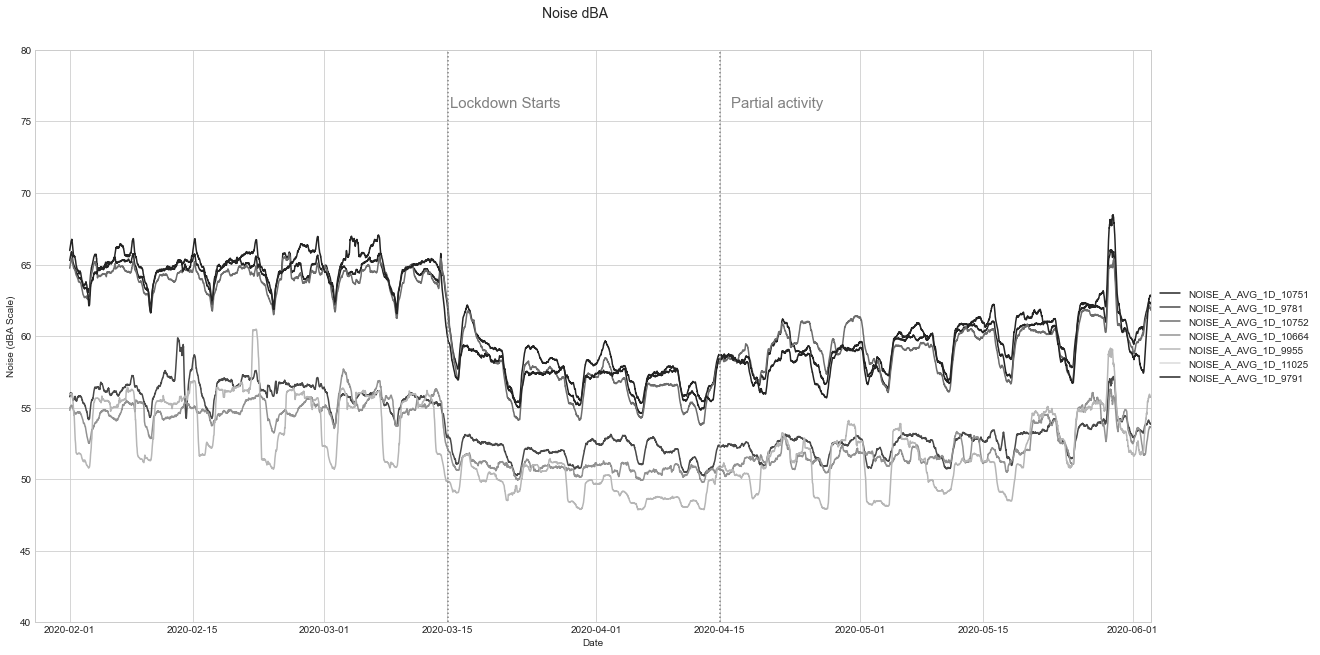

In [47]:
traces = {
            "1": {"devices": [10751, 9781, 10752, 10664, 9955, 11025, 9791],
                  "channel": "NOISE_A_AVG_1D",
                  "subplot": 1}  
        }

options ={"min_date": '2020-02-01'}
formatting = {"xlabel": "Date",
              "ylabel": {1: "Noise (dBA Scale)"},
              "yrange": {1: [40, 80]},
              "xrange": {1: ['2020-01-28', '2020-06-03']},
              "title": "Noise dBA",
              "sharex":True,
              "grid": True,
              "legend": True,
              "height": 10,
              "width": 20,
              "suptitle_factor": 0.92,
              "style": "seaborn-whitegrid",
              "palette": "gist_gray",
              "decorators": {'axvline': ['2020-03-15', '2020-04-15'],
                               'xtext': {'2020-03-15 06:00:00': 'Lockdown Starts', 
                                         '2020-04-16 06:00:00': 'Partial activity'},
                            }
              }

test_kits.ts_plot(traces = traces, options = options, formatting = formatting);

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

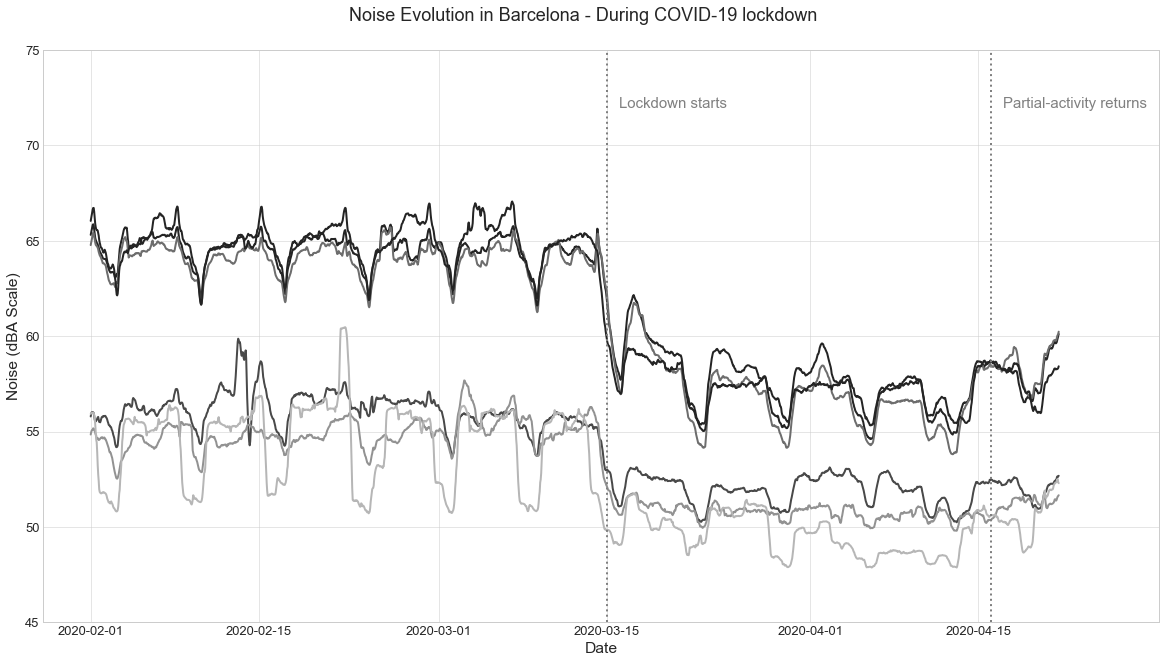

Exporting Noise to /Users/macoscar/Desktop/IAAC-Article
Saved plot


In [350]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": [10751, 9781, 10752, 10664, 9955, 11025, 9791],
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 1}}},
                    "options": {"show_plot": True,
                                "export_path": '/Users/macoscar/Desktop/IAAC-Article', 
                                "file_name": 'Noise',
                                "frequency": '1H',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-02-01'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "yrange": {1: [45, 75]},
                                   "xrange": {1: ['2020-01-28', '2020-04-30']},
                                   "title": "Noise Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "legend": False,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "suptitle_factor": 0.92,
                                   "style": "seaborn-whitegrid",
                                   "palette": "gist_gray",
                                   "decorators": {'axvline': ['2020-03-15', '2020-04-16'],
                                                  'xtext': {'2020-03-16': 'Lockdown starts', 
                                                           '2020-04-17': 'Partial-activity returns'},
                                                  }
                                  }
                    }

plot = Plot(plot_description)
plot.plot(data)
plot.export()

In [115]:
plot.export()

Exporting Noise to /Users/macoscar/Desktop/IAAC-Article
Saved plot


Looking a bit more into detail for some of the devices:

Preparing data for plot
Making 2 subplots
Plotting


<Figure size 432x288 with 0 Axes>

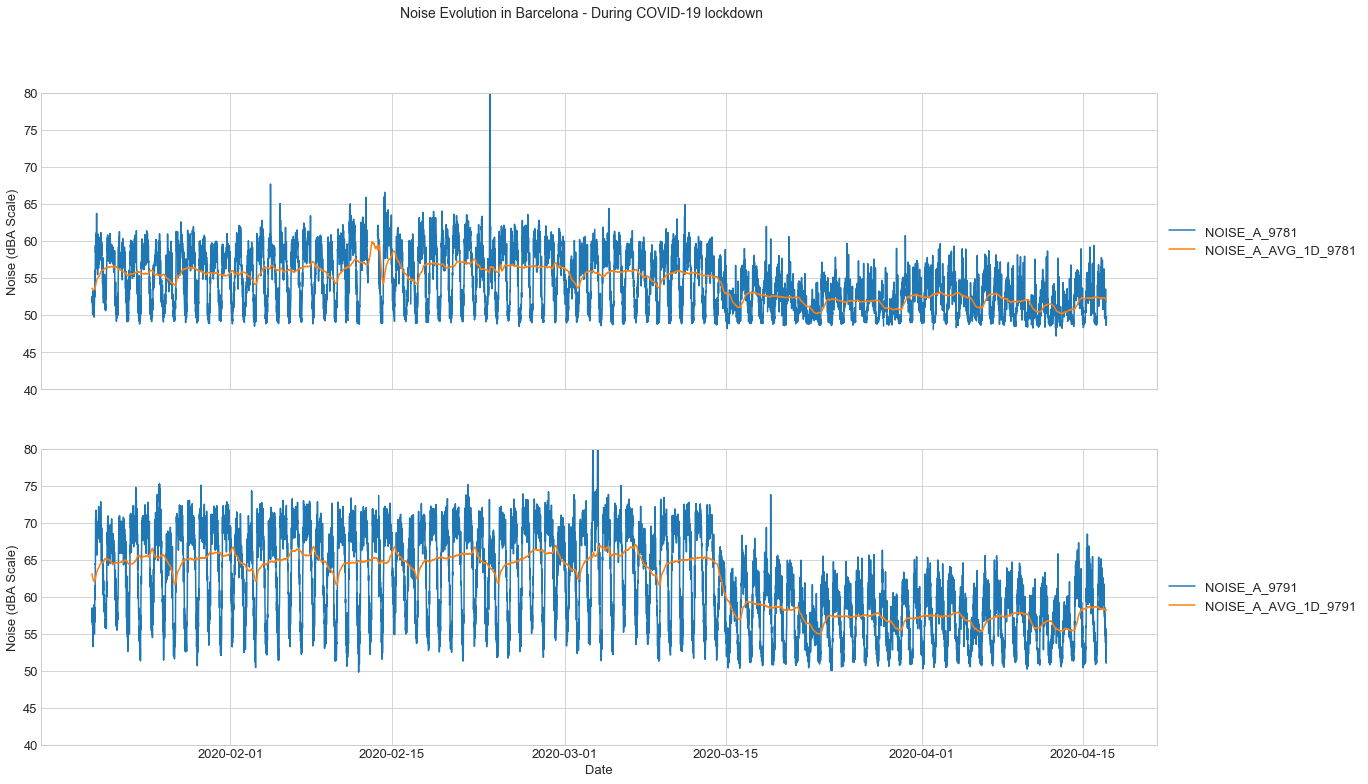

In [115]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                                    "traces": {"1": {"device": [9781],
                                                    "channel" : "NOISE_A",
                                                    "subplot": 1},
                                               "2": {"device": [9781],
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 1},
                                              "3": {"device": [9791],
                                                    "channel" : "NOISE_A",
                                                    "subplot": 2},
                                               "4": {"device": [9791],
                                                    "channel" : "NOISE_A_AVG_1D",
                                                    "subplot": 2}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '15Min',
                                "clean_na": None,
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Date",
                                   "ylabel": {1: "Noise (dBA Scale)", 2: "Noise (dBA Scale)"},
                                   "yrange": {1: [40, 80], 2: [40, 80]},
                                   "title": "Noise Evolution in Barcelona - During COVID-19 lockdown",
                                   "sharex":True,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 12,
                                   "width": 20,
                                   "style": "seaborn-whitegrid"}
                    }

plot = Plot(plot_description)
plot.plot(data)

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

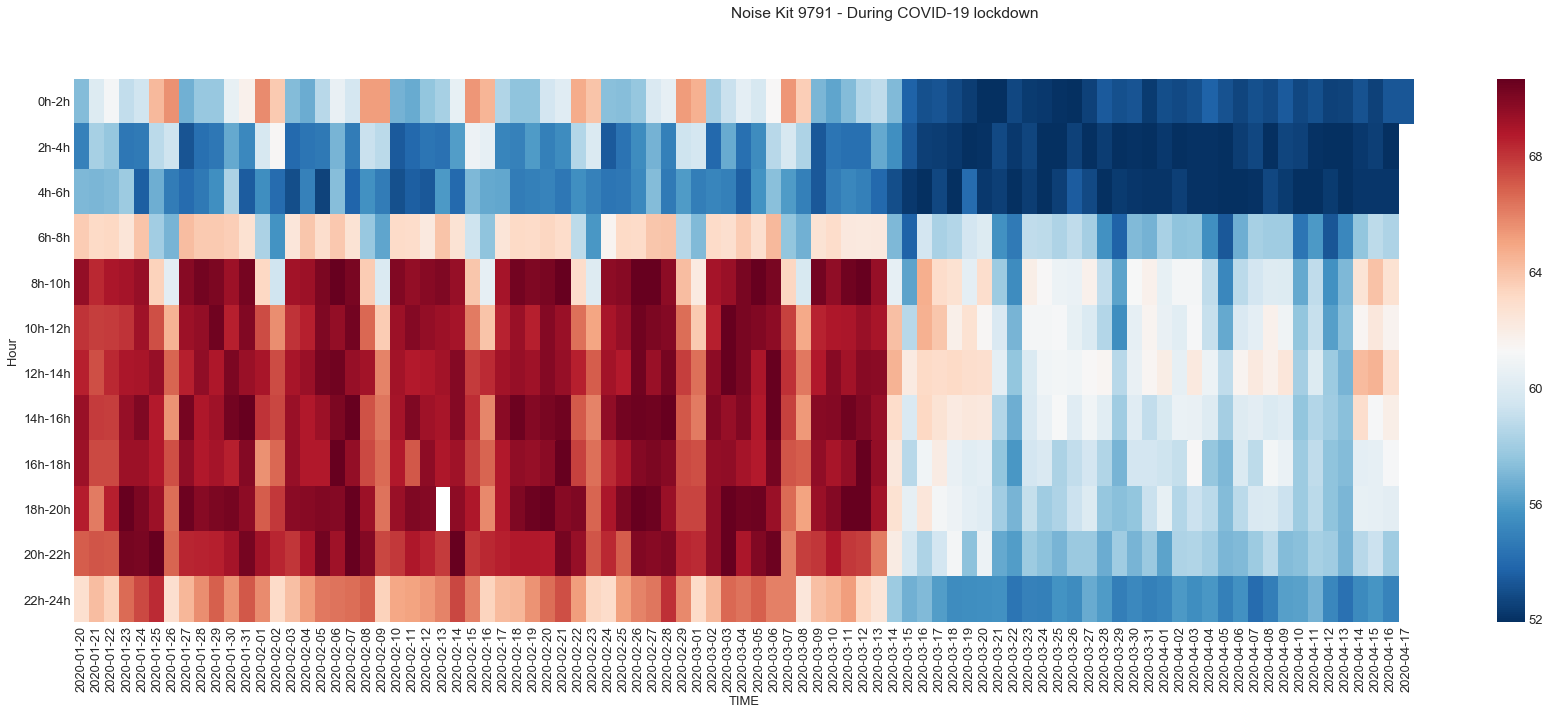

In [106]:
plot_description = {"type": "heatmap",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": [9791],
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '10Min',
                                "clean_na": None,
                                "min_date": '2020-01-20',
                                "max_date": None,
                                "relative": False
                                },
                    "formatting": {"title": "Noise Kit 9791 - During COVID-19 lockdown",
                                   "cmap": "RdBu_r",
                                   "robust": True,
                                   "vmin": None,
                                   "vmax": None,
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 30,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

[INFO]: Using default formatting
[INFO]: Preparing data for plot
[INFO]: Making 1 subplots


<Figure size 432x288 with 0 Axes>

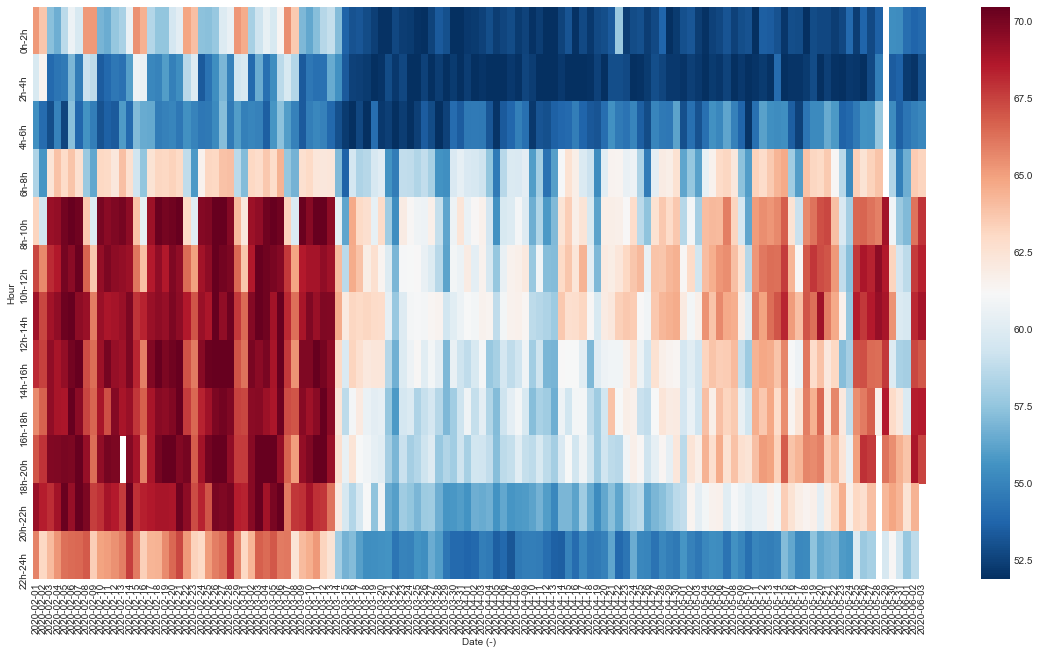

In [49]:
traces = {
            "1": {"devices": [9791],
                  "channel": "NOISE_A",
                  "subplot": 1},
        }

options = {'frequency':'2H', 'clean_na': 'drop', 'min_date': '2020-02-01'}

test_kits.heatmap_plot(traces = traces, options = options);

In [ ]:
plot_description = {"type": "boxplot",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": 9955,
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": "plot_heat",
                                "frequency": '1Min',
                                "clean_na": None,
                                "min_date": None,
                                "max_date": None,
                                "periods": {"dates": ['2020-01-20', '2020-03-15', None],
                                            "labels": ["Pre-lockdown", "Post-lockdown"]
                                           },
                                "relative": False
                                },
                    "formatting": {"title": "Noise 9955 - Comparison of pre and during COVID-19 lockdown",
                                   "cmap": "plasma",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

Below we can find a comparison between the average levels, averaged during the day, as well as the variation of these levels in different timeframes during the day. 
This reflects not only an overall decrease of the noise levels during the day, but also an important reduction in how variable the noise pollution is [1]. This effect is often overseen in many analysis by considering only the average reduction. As well, we can see that the average noise levels extend over 60dBA over 10pm and over 55dBA over midnight. The device shown below is located in a secondary street, and it is likely that the noise levels seen are due to not only traffic but as well leisure activities.

The recommendations of WHO [2] (53dB during day time hours by traffic road levels, and 45dB during night time) - not directly comparable due to testing methods, but certainly an indication.

1 Source: https://www.nature.com/articles/jes201321
2 Source: http://www.euro.who.int/en/health-topics/environment-and-health/noise/environmental-noise-guidelines-for-the-european-region

Preparing data for plot
Making 1 subplots
Plotting


<Figure size 432x288 with 0 Axes>

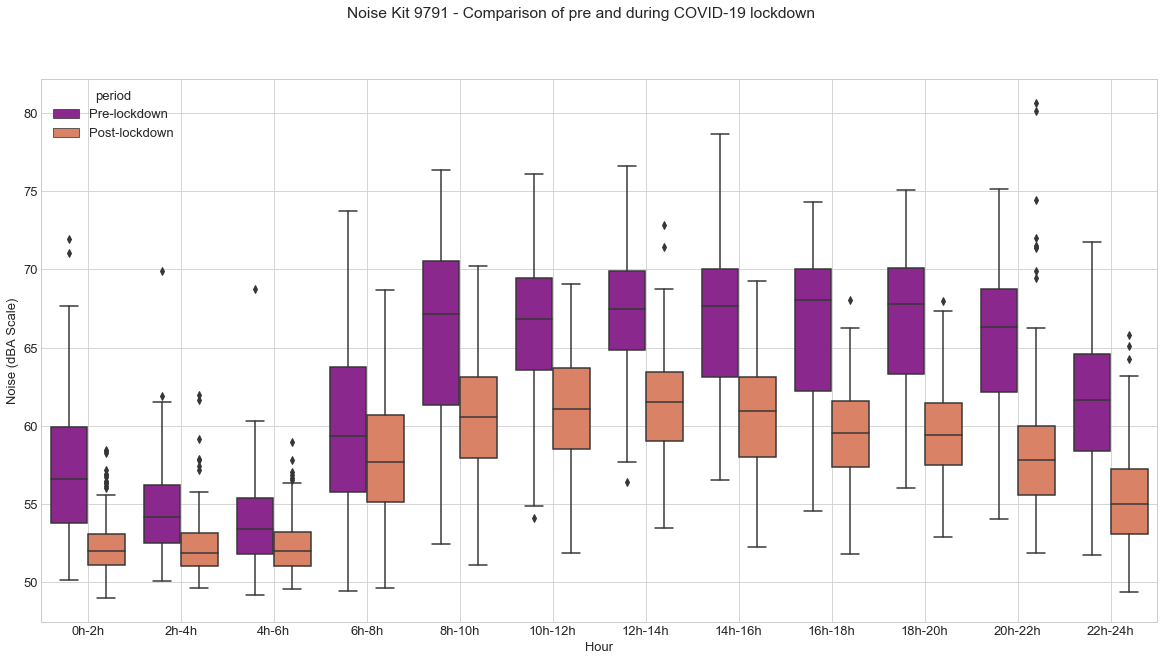

In [114]:
plot_description = {"type": "boxplot",
                    "library": "matplotlib",
                    "data": {"test": sck_testname_outdoor,
                    				"traces": {"1": {"device": [9791],
                                        			"channel" : "NOISE_A",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '1Min',
                                "clean_na": None,
                                "min_date": '2020-03-08',
                                "max_date": '2020-03-24',
                                "periods": {"dates": ['2020-01-20', '2020-03-17', None],
                                            "labels": ["Pre-lockdown", "Post-lockdown"]
                                           },
                                "relative": False
                                },
                    "formatting": {"title": "Noise Kit 9791 - Comparison of pre and during COVID-19 lockdown",
                                   "cmap": "plasma",
                                   "ylabel": {1: "Noise (dBA Scale)"},
                                   "grid": True,
                                   "fontsize": 13,
                                   "height": 10,
                                   "width": 20,
                                   "frequency_hours": 2}
                    }

plot = Plot(plot_description)
plot.plot(data)

## Make Report

In [ ]:
## Export
import subprocess
import traceback

filename = str('Pollution Analysis during COVID-19 Lockdown')
print (f'Creating delivery report for {filename}')

subprocess.call(['jupyter', 'nbconvert', f'{filename}.ipynb',
                 '--config', 'sc_nbconvert_config.py',  '--sc_Preprocessor.expression="show_only_output"',
                 '--to', 'html',  '--TemplateExporter.template_file=./templates/full_sc',
                 '--output-dir=../data/reports', f'--output={filename}.html'])

subprocess.call(['open', f'../data/reports/{filename}.html'])

In [ ]:
# Load env variables
from os.path import join
from src.saf import paths

with open('.env', 'r') as file:
    S3_IDR = file.readline().strip('\r\n').split('=')[1]
    S3_SECRETR = file.readline().strip('\r\n').split('=')[1]
    S3_BUCKETR = file.readline().strip('\r\n').split('=')[1]

%env S3_ID=$S3_IDR
%env S3_SECRET=$S3_SECRETR
%env S3_BUCKET=$S3_BUCKETR

from src.tools.backup import S3handler
s3handler = S3handler()
s3handler.get_objects()

filehtml = join(paths['dataDirectory'], f'reports/{filename}.html')

try:
    s3handler.upload(filehtml, f'reports/{filename}.html', expiration=14*24*3600) #expiration in seconds
except:
    traceback.print_exc()
    pass